In [1]:
import evapo
import inmet
import temp
import umi
import prec
import vento
import os
from dotenv import load_dotenv


In [2]:
#carrega a variavel .env
load_dotenv()

# chave de acesso
TOKEN = os.getenv('token')
URL = os.getenv('url')
URL_ST = os.getenv('url_st')

In [3]:
#Intervalo de tempo
data_inicial = '2022-10-17'
data_final = '2022-11-29'

In [5]:
#Lista as estações e retorna as estações do Espirito Santo
estacoes = inmet.get_estacoes('T')
estacoes = estacoes.groupby("SG_ESTADO").get_group("ES")
cod_estacao = list(estacoes["CD_ESTACAO"])

In [6]:
# Consulta as lista de estações cadastradas no inmet
result = inmet.sync_converter_router(data_inicial, data_final, cod_estacao)
result



,DC_NOME,PRE_INS,TEM_SEN,VL_LATITUDE,PRE_MAX,UF,RAD_GLO,PTO_INS,TEM_MIN,VL_LONGITUDE,...,TEM_MAX,TEN_BAT,VEN_RAJ,TEM_CPU,TEM_INS,UMD_INS,CD_ESTACAO,HR_MEDICAO,Data_Hora_UTC,ID
0,AFONSO CLAUDIO,959,19.3,-20.10416666,959.3,ES,-3.2,15.3,18.5,-41.10694444,...,19.3,12.4,2.3,21,18.6,81,A657,00:00:00,2022-10-17 00:00:00,3
1,AFONSO CLAUDIO,958.4,18.5,-20.10416666,959,ES,-3.2,14.9,18.1,-41.10694444,...,18.6,12.4,2.3,20,18.1,81,A657,01:00:00,2022-10-17 01:00:00,4
2,AFONSO CLAUDIO,957.9,18.3,-20.10416666,958.4,ES,-3.5,14.5,17.1,-41.10694444,...,18.1,12.4,1.7,20,17.3,84,A657,02:00:00,2022-10-17 02:00:00,5
3,AFONSO CLAUDIO,957.5,18.5,-20.10416666,957.9,ES,-3.5,13.9,17,-41.10694444,...,17.6,12.3,1.4,19,17.1,82,A657,03:00:00,2022-10-17 03:00:00,6
4,AFONSO CLAUDIO,957.9,17.2,-20.10416666,957.9,ES,-3.5,14,15.9,-41.10694444,...,17.1,12.3,1.4,18,15.9,89,A657,04:00:00,2022-10-17 04:00:00,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12667,VITÓRIA,1005.4,21,-20.27083332,1005.4,ES,-1.7,21.3,22.8,-40.30583333,...,23.3,12.6,7.8,25,22.8,91,A612,19:00:00,2022-11-29 19:00:00,1054
12668,VITÓRIA,1006.4,23.5,-20.27083332,1006.4,ES,-2.4,21.1,22.7,-40.30583333,...,23.4,12.6,7.8,25,23.2,88,A612,20:00:00,2022-11-29 20:00:00,1055
12669,VITÓRIA,1006.7,23.1,-20.27083332,1006.7,ES,-0.6,22,23,-40.30583333,...,23.4,12.6,7.3,24,23.4,92,A612,21:00:00,2022-11-29 21:00:00,1056
12670,VITÓRIA,1007,22,-20.27083332,1007,ES,-1.6,21.7,22.8,-40.30583333,...,23.4,12.6,8.2,24,22.9,93,A612,22:00:00,2022-11-29 22:00:00,1057


In [ ]:
#Realiza o calculo de temperatura minima absoluta,media e maxima absoluta do ar e retorna o grafico
result = temp.periodo_absoluto(data_inicial,data_final,cod_estacao)
temp.graf_temp(result)

In [ ]:
#Realiza o calculo de media da temperatura minima ,media da instantanea e media da temperatura maxima absoluta do ar e retorna o grafico
result = temp.periodo_media(data_inicial,data_final,cod_estacao)
temp.graf_temp(result)

In [ ]:
#
result = evapo.radiacao(data_inicial,data_final,cod_estacao)
print(result)
#evapo.graf_evap(result)



In [ ]:
result = umi.periodo_media(data_inicial,data_final,cod_estacao)
umi.graf(result)

In [ ]:
#Realiza o calculo de precipitação e retorna o grafico de todas as estações
result = evapo.radiacao(data_inicial,data_final,cod_estacao)
evapo.graf_prec(result)

In [ ]:
#Realiza a distribuição de velocidade e direção do vento e retorna o grafico de todas as estações
result = evapo.radiacao(data_inicial, data_final, cod_estacao)
evapo.graf_prec_evap(result)

<Figure size 800x800 with 0 Axes>

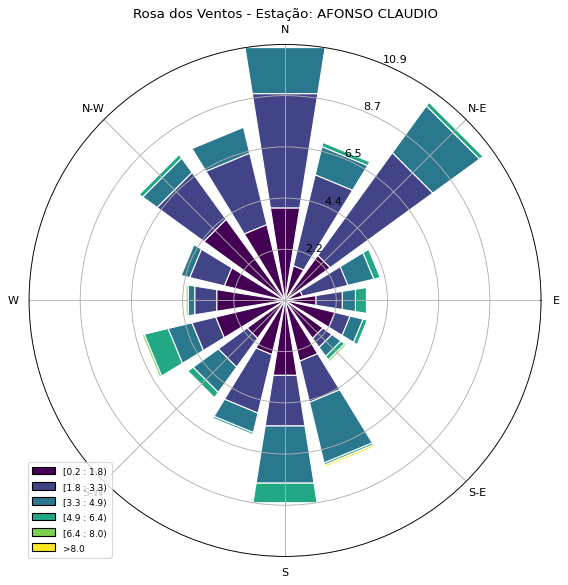

<Figure size 800x800 with 0 Axes>

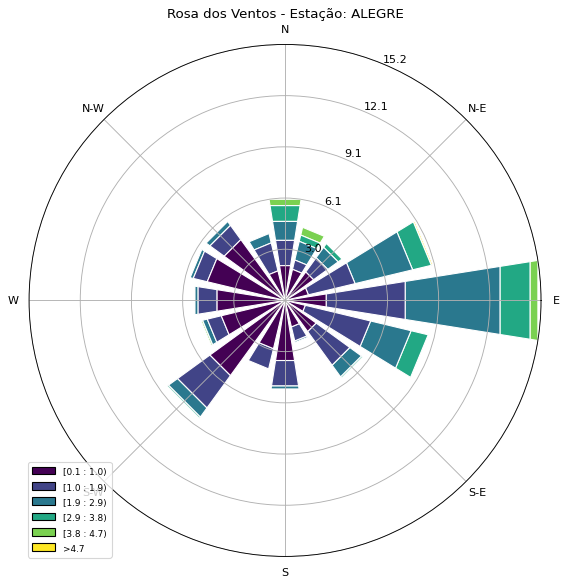

<Figure size 800x800 with 0 Axes>

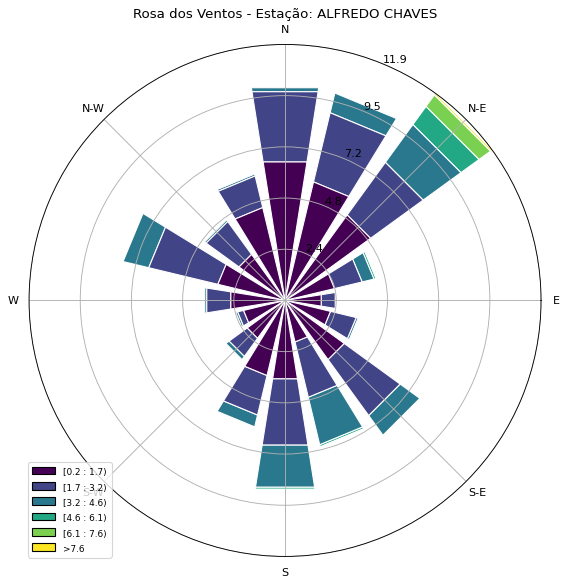

<Figure size 800x800 with 0 Axes>

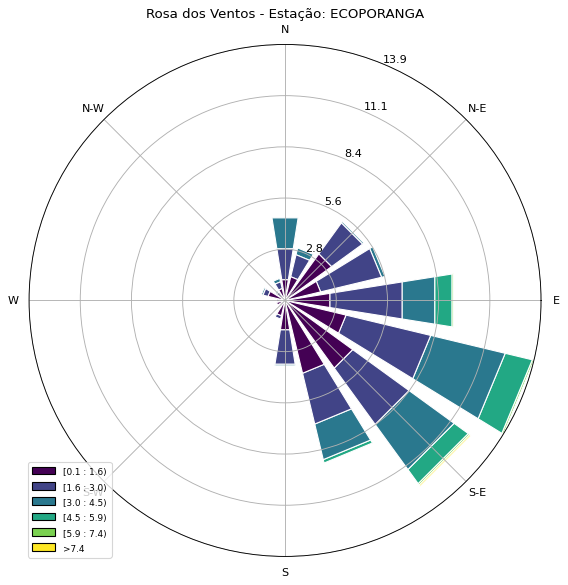

<Figure size 800x800 with 0 Axes>

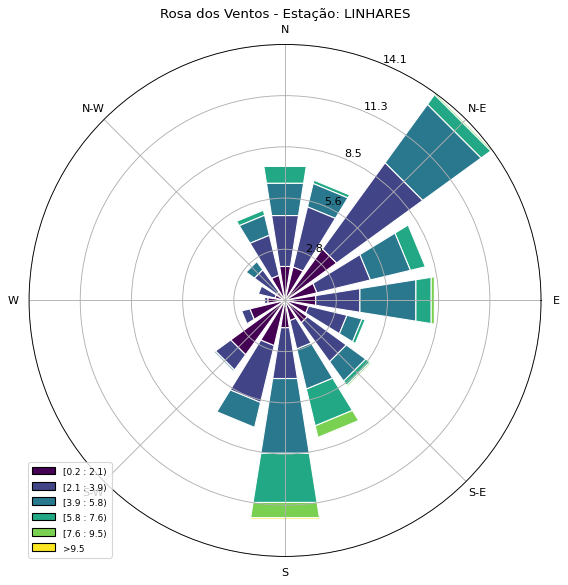

<Figure size 800x800 with 0 Axes>

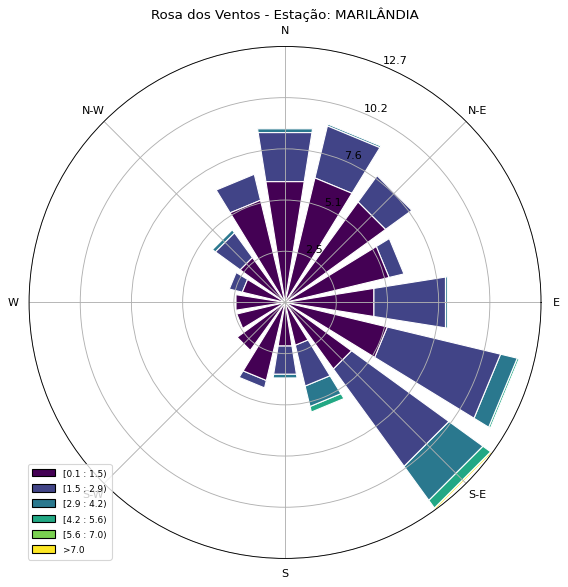

<Figure size 800x800 with 0 Axes>

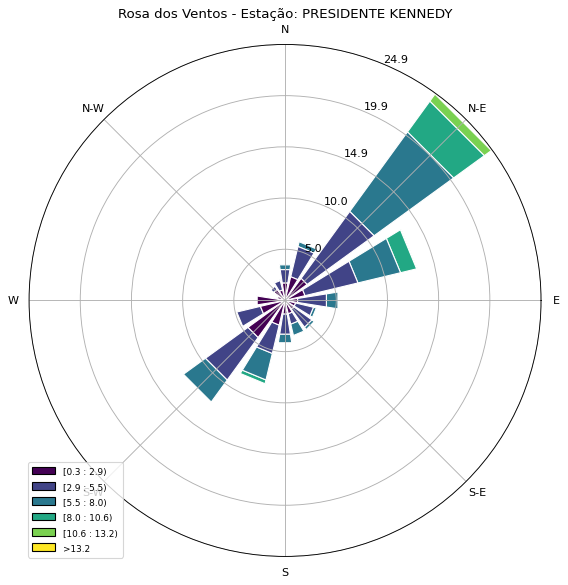

<Figure size 800x800 with 0 Axes>

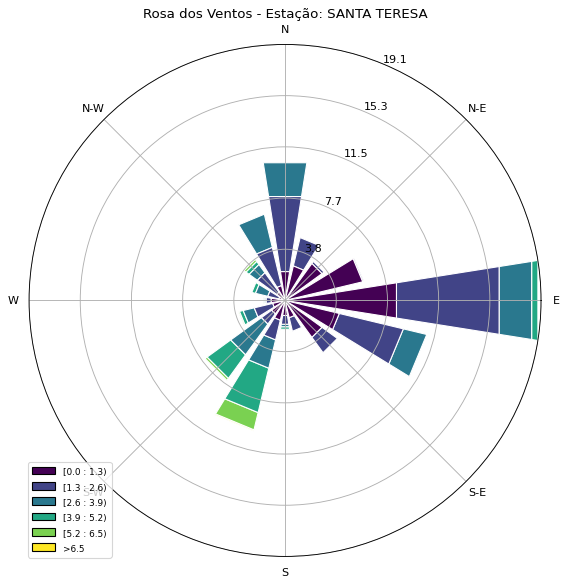

<Figure size 800x800 with 0 Axes>

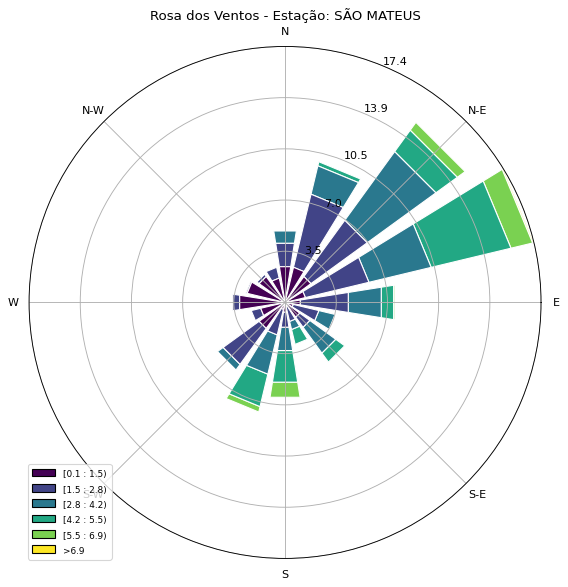

<Figure size 800x800 with 0 Axes>

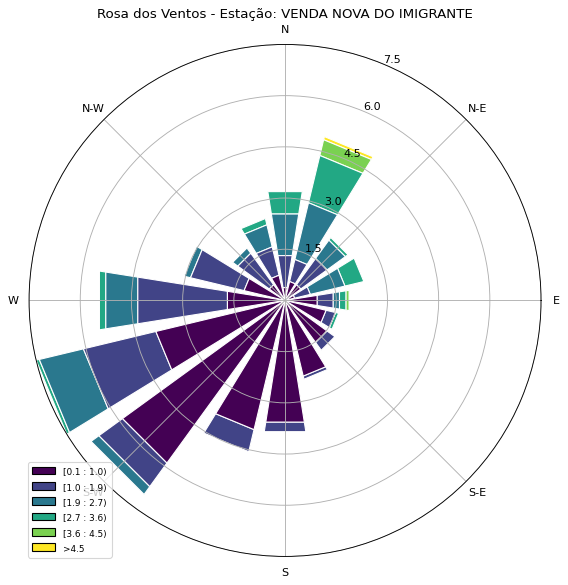

<Figure size 800x800 with 0 Axes>

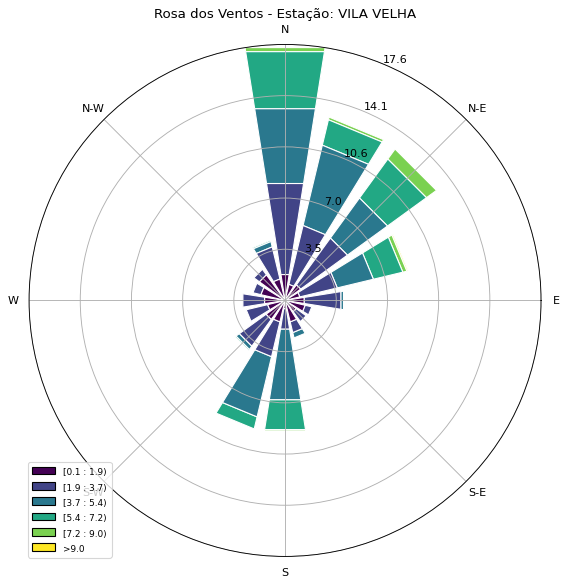

<Figure size 800x800 with 0 Axes>

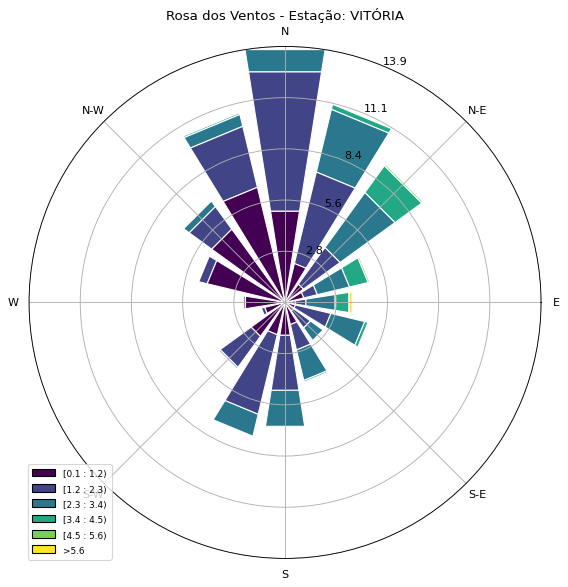

In [22]:
result = vento.periodo(data_inicial, data_final, cod_estacao)
vento.graf(result)

In [ ]:
result = prec.precipitacao(data_inicial,data_final,cod_estacao)
prec.graf_prec(result)